In [ ]:
!pip install opendatasets -q

In [ ]:
# import nessasary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


import opendatasets as od


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile
import os

# Replace 'your_dataset.zip' with the uploaded file name
with zipfile.ZipFile('Dataset_01.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # Extract to a folder named 'data'

# Check the contents of the extracted folder
print(os.listdir('data'))


['Dataset_01', '__MACOSX']


In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = (256 , 256)

In [ ]:
 train_data_dir = "/content/data/Dataset_01"

In [ ]:
 train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

 validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 1058 files belonging to 2 classes.
Using 953 files for training.
Found 1058 files belonging to 2 classes.
Using 105 files for validation.


In [ ]:
class_names = train_data.class_names
class_names

['Dogs', 'cats']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)
  print(label_batch.shape)

(64, 256, 256, 3)
(64,)
(64,)


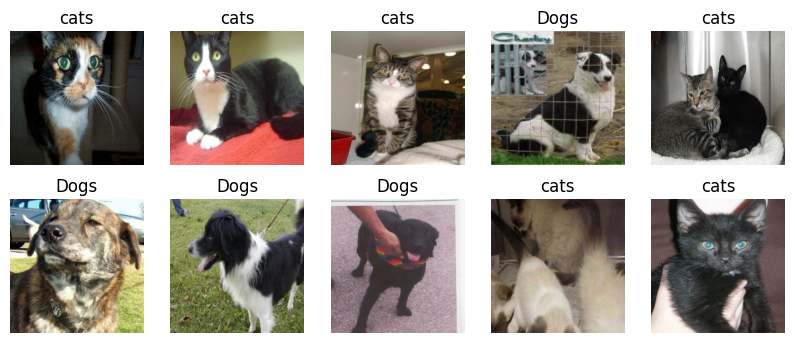

In [ ]:
# plot some data sample

plt.figure(figsize=(10,4))
for image, label in train_data.take(1):
  for i in range (10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")


data preposssing


In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 47.984375    46.984375    44.984375  ]
   [ 55.73828     54.73828     52.73828   ]
   [ 52.69336     51.69336     49.69336   ]
   ...
   [ 45.38672     53.001953    40.695312  ]
   [ 53.36914     59.73828     55.523438  ]
   [ 63.523438    68.646484    71.03125   ]]

  [[ 33.707397    32.707397    30.707397  ]
   [ 43.71985     42.71985     40.71985   ]
   [ 42.93347     41.93347     39.93347   ]
   ...
   [ 30.884949    39.05774     25.635986  ]
   [ 34.477722    40.846863    35.488586  ]
   [ 54.252075    60.16986     59.947388  ]]

  [[ 34.86554     31.33429     30.17804   ]
   [ 46.78595     43.2547      42.09845   ]
   [ 48.349182    44.817932    43.661682  ]
   ...
   [ 30.09668     38.651794    22.453247  ]
   [ 24.3974      31.61029     22.979553  ]
   [ 49.295044    55.398865    53.115356  ]]

  ...

  [[102.55499     94.35156     71.45117   ]
   [ 99.60181     92.49335     68.06952   ]
   [102.4162      95.27405     70.897095  ]
   ...
   [ 79.17139     91.363

normalization


In [ ]:
 train_data = train_data.map(lambda x, y: (x / 255.0, y))
 validation_data = validation_data.map(lambda x, y: (x / 255.0, y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[4.06878958e-13 3.70507634e-13 3.34136364e-13]
   [4.05074330e-13 3.68703006e-13 3.32331737e-13]
   [4.08144384e-13 3.71773088e-13 3.35401791e-13]
   ...
   [6.18233980e-13 6.03685504e-13 5.92774148e-13]
   [5.97768146e-13 5.86498460e-13 5.69029361e-13]
   [5.97519484e-13 5.86608073e-13 5.61148187e-13]]

  [[4.14735466e-13 3.78364169e-13 3.41992846e-13]
   [4.23315896e-13 3.86944600e-13 3.50573276e-13]
   [4.27468174e-13 3.91096850e-13 3.54725553e-13]
   ...
   [6.23561912e-13 6.09013436e-13 5.98102026e-13]
   [6.06018382e-13 5.93565507e-13 5.78462896e-13]
   [6.05383311e-13 5.94471954e-13 5.74084183e-13]]

  [[4.13858563e-13 3.77487294e-13 3.41115970e-13]
   [4.31674878e-13 3.95303527e-13 3.58932258e-13]
   [4.36789548e-13 4.00418251e-13 3.64046982e-13]
   ...
   [6.29259448e-13 6.14710973e-13 6.03799400e-13]
   [6.19277091e-13 6.06824107e-13 5.91721550e-13]
   [6.16443908e-13 6.05532551e-13 5.87346903e-13]]

  ...

  [[2.16191851e-13 1.90731938e-13 1.61634879e-13]
   [2

In [ ]:
import tensorflow as tf

# Assuming 'train_data' is your normalized dataset
for image_batch, label_batch in train_data.take(1):
  min_pixel_value = tf.reduce_min(image_batch).numpy()
  max_pixel_value = tf.reduce_max(image_batch).numpy()

  print("Minimum pixel value after normalization:", min_pixel_value)
  print("Maximum pixel value after normalization:", max_pixel_value)

Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 9.274685e-13


data augmentation


In [ ]:
data_augmentation = tf.keras.Sequential(
    [
  tf.keras.layers.RandomFlip("horizontal_and_vertical",input_shape=(256,256,3)),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),

    ]

    )

model **building**

In [ ]:
model = tf.keras.Sequential()


model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(64,3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(256,3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())


model.add(tf.keras.layers.BatchNormalization()) # Changed to BatchNormalization

model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))

model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
i need to add a another layer to my model

SyntaxError: invalid syntax (<ipython-input-1-d781f9f621b1>, line 1)

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      29,491,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,883,841 (114.00 MB)

 Trainable params: 29,883,329 (114.00 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
 model.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['accuracy'])

In [ ]:
start_time = time.time()
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=1)
end_time = time.time()

15/15 ━━━━━━━━━━━━━━━━━━━━ 432s 28s/step - accuracy: 0.4672 - loss: 0.6967 - val_accuracy: 0.4381 - val_loss: 0.6939


In [ ]:
import cv2

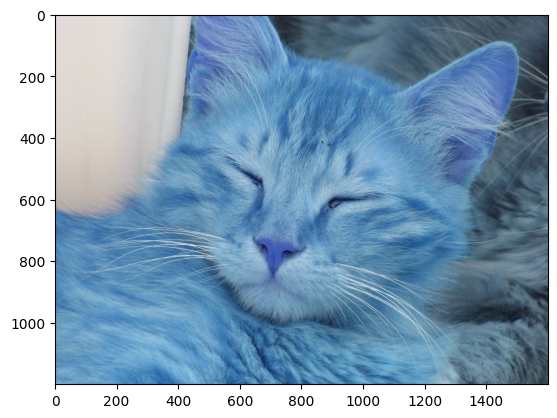

In [ ]:
image = cv2.imread("/content/gsfh.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image,(128,128))
scaled = resized_image/255

In [ ]:
scaled

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.6797947 , 0.6052849 , 0.4716452 ],
        [0.68001026, 0.60550046, 0.47308624],
        [0.6831324 , 0.6086226 , 0.47921082],
        ...,
        [0.70332414, 0.6209712 , 0.49820772],
        [0.6987428 , 0.6193923 , 0.49240088],
        [0.7005817 , 0.6209869 , 0.49411765]],

       [[0.6803298 , 0.60582   , 0.4721803 ],
        [0.68235296, 0.60784316, 0.4754289 ],
        [0.68235296, 0.60784316, 0.47843137],
        ...,
        [0.7031043 , 0.62336093, 0.5005974 ],
        [0.7033975 , 0.6210446 , 0.4969911 ],
        [0.6998468 , 0.6217218 , 0.49411765]],

       [[0.68259984, 0.60809004, 0.47445032],
        [0.6808517 , 0.6063419 , 0.4739277 ],
        [0.6816393 , 0.6071295 , 0.47771773],
        ...,
        [0.70298713, 0.6226473 , 0.5007659 ],
        [0.70448834, 0.6221354 , 0.49775356],
        [0.70532906, 0.6240827 , 0.49803922]],

       ...,

       [[0.2900168 , 0.26386252, 0.27916223],
        [0.26

In [ ]:
np.expand_dims(scaled,0).shape

(1, 128, 128, 3)

In [ ]:
y_hat = model.predict(np.expand_dims(scaled,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [ ]:
y_hat

array([[0.4806813]], dtype=float32)

In [ ]:
class_names

['Dogs', 'cats']

In [ ]:
if y_hat > 0.5:
  print(f"predicted class is {class_names[1]}")
else:
  print(f"predicted class is {class_names[0]}")

predicted class is Dogs
